In [1]:
!pip install sentence-transformers


In [2]:
from sentence_transformers import SentenceTransformer, util


model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")


sentences = [
    "Romalılar Pun müharibəsi dövründə Yunan teatr mədəniyyətini daha dərindən mənimsəyə bilmişlər.",
    "Müəllifin maraqlı izahı ilə hadisələrin gedişi zamanı çarizmin Göytəpə kəndinə, bu kəndin sakinlərinə münasibəti fonunda bütövlükdə Azərbaycana və Azərbaycan xalqına münasibəti kimi diqqəti cəlb edir.",
    "Məmmədlinin dram əsərlərində təqdim edilən hər bir mövzu maraqlı sujet xətti, dolğun faktları eləcə də məkan və zaman baxımından tamlığı hər zaman diqqət mərkəzində olmağı bacarır.",
    "Ramiz Vəliyev bir daha obrazın mahiyyətini açıb göstərməklə Portyaginin daxili aləminin mahiyyət etibari ilə nə qədər düşüncəsiz və siyasi baxımdan isə Cavad xanın düşüncələri qarşısında aciz olduğunu da dəqiq detallarla təqdim edə bilir.",
    "Ayını oynayan aktyor tələsdiyindən, maskasını tərs taxıb, özündən xəbəri yoxdur.",
    "Hərə gülməkdən səhnənin bir tərəfinə yıxılıb, guya ki, ayıdan qorxub titrəyirik.",
    "Ayı, bizə yaxınlaşıb tamaşanın sözlərini deyir, biz isə gülməkdən ona cavab verə bilmirik.",
    "Buna yaxın düşmək olmayacaq, belimiz qırıldı.",
    "Kişini niyə yoldan çıxarmısınız?",
    "Bundan sonra Məhəmməd dayı bilirdi ki, biz gəlmişik, binadan çıxıb bizə qoşulurdu.",
    "Axı mən, nə günah eləmişəm, ay Məhəmməd dayı?",
    "Mən qətiyyətlə cavab verdim.",
    "Mənim də öz prinsiplərim var.",
    "Səhəri işə tələsdim.",
    "Teatrın həyətində dayanan aktyor yoldaşlarım maraqla nə olduğunu öyrənmək üçün üstümə gəldi.",
    "Ümidsiz düşüncələrə dalmışdım ki, qapı səsinə diksindim.",
    "Sükut uzandıqca ümidim daha da azalırdı.",
    "Əşşi, bu müdir heç bizi qəbul da etmir, durun gedək demək üçün ayağa qalxdığım anda, müdirin otağının qapısı açıldı.",
    "Bu seçimi etmək üçün şüur, düşüncə tərzi, ziya-nur, istedad verildi.",
    "Qurban verir və qurban verməkdə davam edir.",
    "Bəs bu hal nədən doğur?",
    "Biz nə edirik?",
    "Tarixin bir çox dövrlərində belə hallar çox olub.",
    "Çünki bu mövqedə elm var.",
    "İndi biz birinci sualın cavabını araşdıraq.",
    "Zöhd çəkinmə deməkdir və rəğbətə, yəni meyl göstərməyə ziddir.",
    "Bu həm acizlik səbəbindən, həm də ona aid olan qərəz ya əvəz cəhətdən ola bilər.",
    "O da altı fəsli əhatə edir.",
    "Bu iki bilgi bütün hallarda həmin nemətin qəbulunu təmin edir.",
    "Bunlar üstləri örtülü istəklərdir.",
    "Bir sözlə, məcazi fikirlərdən uzaq olmalıdır.",
    "Bunların hamısı seyrin başlanğıcıdır.",
    "Onda fərəh aşkar olar.",
    "Rica ilə xof tarazlaşdırılır.",
    "Məsələ burasındadır ki, nəzəriyyə problemi həmişəcavan bir problemdir.",
    "Bunu elə bu cür öyrənmək, qavramaq və istifadə etmək gərəkdir.",
    "Çox qısaca konsepsiyanın məğzi bundan ibarətdir: elmi biliyin inkişafı ikimərhələli bir prosesdir.",
    "Məhz bu səbəbdəndir ki, elmin inkişafında tarazsızlıq müşahidə edilmir.",
    "Onlar həmin qeyri-adiliklərin səbəbləri ilə heç maraqlanmırlar.",
    "İkinci yol daha uzun zaman kəsiyində baş verir.",
    "Belə düşünmək isə absurddur.",
    "Lakin bioloji biliyin və praktikanın inkişafı bu mövqeyin əsassız olduğunu konkret faktlarla təsdiqlədi.",
    "Mənası budur ki, elementlərdən sistemin quraşdırılması mürəkkəb bir prosesdir.",
    "Deməli burada bir anomaliya baş verir.",
    "Gətirmək istədiyimiz digər bir misal heyvanlar aləminə aiddir.",
    "Bütövlükdə olmasa da, onların hər birində şəksiz rasional məqamlar vardır və məqbul sayılmalıdır.",
    "Bütün digər əlaqələrdən bu hal üçün mühüm olmadıqlarına görə, sərfnəzər edilir.",
    "Lakin burada bir məqamı xüsusi vurğu ilə qeyd etməliyik.",
    "Deməli, optimal en, uzun, hündürlük parametrləri stolun stol olması üçün mühümdür.",
    "O real gerçəklikdəki predmet və hadisələri olduğu kimi yox, ideallaşdırılmış şəkildə inikas etdirir.",
    "Əlbəttə, bununla da biz idrak obyektini kobudlaşdırırıq, kasıblaşdırırıq, sadələşdiririk.",
    "Bunlar üzərində nəzəriyyə qurula bilməz.",
    "Dərk edilmiş qanun, nəzəriyyə insanların uğurlu fəaliyyətinin əsasıdır.",
    "Ona görə də həmin adamlar səpdikləri bitkini su və günəş işığı ilə təmin edirlər.",
    "Əgər bitkiyə su və işıq verilməzsə, o, məhv olar.",
    "Bu faktlar sanki bunların təsir gücü dairəsinə sığmırlar.",
    "Bundan hər birinə iki yaxşı xislət və iki bəd xislət verilibdir.",
    "Artıq 2000–2025-ci illərdə onun həyatında və yaradıcılığında yeni mərhələ başlamışdır.",
    "Məhz belə davranış onun şəxsiyyətinin əsas yönümünə əsaslanır.",
    "Bu, şəxsiyyətin yönümünə münasibətdə zahiri təsadüfdən ibarətdir.",
    "Bu cinayət daxili təsadüfün təzahürü olacaqdır.",
    "Məsələn, eyni bir insanın həyatının dövrləri müxtəlif cəhətlərdən təsvir oluna bilər.",
    "Hüququn formalaşmasına baxsaq proses yuxarıdan aşağı və aşağıdan yuxarı gedə bilər.",
    "Yaxşı olardı ki, faktlara əsaslanan dəqiq qanun toplusu müəyyənləşdirilsin.",
    "Bu əlaqə özünü müxtəlif qarşılıqlı asılılıqda təzahür etdirir.",
    "Sosial normaların bütün növlərinin həm sıx qarşılıqlı əlaqəsinin, həm də onların belə əlaqəsinin spesifikliyinin aşkar edilməsi çox vacibdir.",
    "O, insanı orta səviyyəyə deyil, ideala istiqamətləndirir.",
    "Şəhərsalma ərazi və funksional baxımdan inkişaf edən zamana görə öz parametrlərini dəyişən və yenidən qurulan obyektlərə söykənir.",
    "Onların inkişafı əvvəlcə kustar, sonra fabrik istehsalı əsasında baş verirdi.",
    "Məskunlaşmanın inkişafı müxtəlif sosial iqtisadi və şəhərsalma amillərinin təsiri ilə baş verir.",
    "Həmin dövrün qadınları çox uzun və enli, həm də üst-üstə geyilmiş tumanla gəzərdilər.",
    "Bu kürklərin boynundan ta ətəklərinədək bədii tikməsi olardı.",
    "Hər halda sual varsa, cavabı axtarmağa dəyər.",
    "Bu şəhərdə neçə-neçə qədim yaşayış evi ayrıca maraq doğurur.",
    "Zərif şəbəkəli əşyaların bədii keyfiyyəti ayrıca səy tələb edən texniki əməliyyat sayəsində alınır.",
    "Naxışlar qədər, rənglər də zəngin və cürbəcürdür.",
    "Məzar daşlarının üzərində daş kitabələr də var.",
    "İnsan yeni texnologiyadan istifadə etdikcə, bəzi hallarda bu texnologiyadan əziyyət də çəkir.",
    "Bu termin də stresslə bağlı xüsusi xəstəliyi ifadə edir.",
    "Həyatımızda stress çox olduqca özümüzü pis hiss edirik.",
    "İnsan həyatında meşənin əhəmiyyətini inkar etmək olmaz.",
    "Yuxusuzluq emosional yüklənmənin xoşagəlməz nəticəsidir.",
    "Bu prosesdə əsas rolu qoxu oynayır.",
    "Meşədə bizim içimizə dolan sakitlik hissi necə yaranır?",
    "Tədqiqatın nəticələri aydın şəkildə göstərir.",
    "İndi siz təbiətlə bütövləşdiniz.",
    "Ruhunuzu oxşayacaq yer tapmaq önəmlidir.",
    "Bundan sonra sakitliyə riayət etmək və qulaq asmaq tələb olunur.",
    "Meşə gözəldir.",
    "İynəyarpaqlı ağacların qoxu xüsusiyyətləri isə daha qabarıqdır.",
    "Bir çox diabetli xəstələrdə hipoqlikemiyanın tənzimlənməsinə qarşı reaksiyanın pisləşməsi və ya hipoqlikemiyanı duymamaq vəziyyəti müşahidə olunur.",
    "Bu kliniki mənzərə araşdırılma və tibbi rejimə yenidən baxılmasını tələb edir.",
    "Hipoqlikemiya titrətmə, əsəbilik, çaşqınlıq, taxikardiya və aclıq kimi əlamətlərlə məhdudlaşmır.",
    "Hipoqlikemiyada narahatlıq və qorxu əlamətləri də çox rast gəlinir.",
    "Belə hal xəstənin həyatı üçün təhlükə və qorxu yaradır.",
    "Hipoqlikemiyanın simptomları yuxarıda göstərilmişdir.",
    "Ona görə də qlükozanın səviyyəsi bərpa edildikdən sonra qida qəbulu tövsiyə olunur.",
    "Onun təyin edilməsi kliniki sınaqlarla öyrənilmiş və qlikemik nəzarət üçün çox faydalıdır.",
    "Belə hallarda yalnız insulin müalicəsi və ya düzgün qidalanma tövsiyə olunur.",
    "Diabetin müalicəsi sahəsində ancaq təcrübəsi olan həkim, xəstəxanaya yerləşdirilən diabetli xəstəni müalicə etməlidir.",
    "Hamilə olmayan bir çox yetkin diabetli insanlarda qlikemik hədəf aşağıda göstərilmişdir.",
    "Ürək-damar, tənəffüs, mədə-bağırsaq, sinir sistemi və digər üzvlərdən heç bir şikayəti yoxdur.",
    "Android tipli bədən quruluşu mövcuddur.",
    "Venadaxili kateter qoyuldu.",
    "Həmin dərman maddəsinin qəbulu ya dayandırılır, ya da dozası korreksiya olunur."
]



embeddings = model.encode(sentences, convert_to_tensor=True)

print("Dataset hazırdır, embedding-lər generasiya olundu.")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Dataset hazırdır, embedding-lər generasiya olundu.


In [3]:
query = "Universitetdə AI haqqında tədbir baş tutdu"
query_emb = model.encode(query, convert_to_tensor=True)

print("Sorğu embedding-i hazırdır.")


Sorğu embedding-i hazırdır.


In [4]:

scores = util.cos_sim(query_emb, embeddings)[0]


for idx, score in enumerate(scores):
    print(f"{idx}. {sentences[idx]}  ---> Oxşarlıq: {score:.4f}")


0. Romalılar Pun müharibəsi dövründə Yunan teatr mədəniyyətini daha dərindən mənimsəyə bilmişlər.  ---> Oxşarlıq: 0.2173
1. Müəllifin maraqlı izahı ilə hadisələrin gedişi zamanı çarizmin Göytəpə kəndinə, bu kəndin sakinlərinə münasibəti fonunda bütövlükdə Azərbaycana və Azərbaycan xalqına münasibəti kimi diqqəti cəlb edir.  ---> Oxşarlıq: 0.2712
2. Məmmədlinin dram əsərlərində təqdim edilən hər bir mövzu maraqlı sujet xətti, dolğun faktları eləcə də məkan və zaman baxımından tamlığı hər zaman diqqət mərkəzində olmağı bacarır.  ---> Oxşarlıq: 0.2176
3. Ramiz Vəliyev bir daha obrazın mahiyyətini açıb göstərməklə Portyaginin daxili aləminin mahiyyət etibari ilə nə qədər düşüncəsiz və siyasi baxımdan isə Cavad xanın düşüncələri qarşısında aciz olduğunu da dəqiq detallarla təqdim edə bilir.  ---> Oxşarlıq: 0.3320
4. Ayını oynayan aktyor tələsdiyindən, maskasını tərs taxıb, özündən xəbəri yoxdur.  ---> Oxşarlıq: 0.1330
5. Hərə gülməkdən səhnənin bir tərəfinə yıxılıb, guya ki, ayıdan qorxub t

In [5]:
import torch


best_idx = torch.argmax(scores).item()

print("\n📌 Ən uyğun cümlə:")
print(sentences[best_idx])
print(f"Oxşarlıq dərəcəsi: {scores[best_idx]:.4f}")



📌 Ən uyğun cümlə:
Onun təyin edilməsi kliniki sınaqlarla öyrənilmiş və qlikemik nəzarət üçün çox faydalıdır.
Oxşarlıq dərəcəsi: 0.4542


In [6]:

sorted_results = torch.argsort(scores, descending=True)

print("📌 Ən uyğun 3 nəticə:")
for idx in sorted_results[:3]:
    print(f"- {sentences[idx]} (oxşarlıq: {scores[idx]:.4f})")


📌 Ən uyğun 3 nəticə:
- Onun təyin edilməsi kliniki sınaqlarla öyrənilmiş və qlikemik nəzarət üçün çox faydalıdır. (oxşarlıq: 0.4542)
- Tədqiqatın nəticələri aydın şəkildə göstərir. (oxşarlıq: 0.4323)
- Çox qısaca konsepsiyanın məğzi bundan ibarətdir: elmi biliyin inkişafı ikimərhələli bir prosesdir. (oxşarlıq: 0.3852)


In [7]:
#Sentiment

In [8]:
#Sentiment

In [9]:
#Sentiment

In [10]:
!pip install transformers sentencepiece
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch


model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

print("Model yükləndi.")

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

Model yükləndi.


In [11]:
import numpy as np

labels = {
    0: "Çox mənfi ",
    1: "Mənfi ",
    2: "Neytral ",
    3: "Müsbət ",
    4: "Çox müsbət"
}

def sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    probabilities = torch.softmax(outputs.logits, dim=1)[0].detach().numpy()
    label_id = np.argmax(probabilities)
    return labels[label_id], float(probabilities[label_id])


In [12]:
text = "Bu gün dərs çox maraqlı keçdi, özümü əla hiss edirəm!"
result, prob = sentiment(text)

print(f"Mətn: {text}")
print(f"Sentiment: {result} (ehtimal: {prob:.4f})")


Mətn: Bu gün dərs çox maraqlı keçdi, özümü əla hiss edirəm!
Sentiment: Çox müsbət (ehtimal: 0.6887)


In [13]:
sentences = [
    "Romalılar Pun müharibəsi dövründə Yunan teatr mədəniyyətini daha dərindən mənimsəyə bilmişlər.",
    "Müəllifin maraqlı izahı ilə hadisələrin gedişi zamanı çarizmin Göytəpə kəndinə, bu kəndin sakinlərinə münasibəti fonunda bütövlükdə Azərbaycana və Azərbaycan xalqına münasibəti kimi diqqəti cəlb edir.",
    "Məmmədlinin dram əsərlərində təqdim edilən hər bir mövzu maraqlı sujet xətti, dolğun faktları eləcə də məkan və zaman baxımından tamlığı hər zaman diqqət mərkəzində olmağı bacarır.",
    "Ramiz Vəliyev bir daha obrazın mahiyyətini açıb göstərməklə Portyaginin daxili aləminin mahiyyət etibari ilə nə qədər düşüncəsiz və siyasi baxımdan isə Cavad xanın düşüncələri qarşısında aciz olduğunu da dəqiq detallarla təqdim edə bilir.",
    "Ayını oynayan aktyor tələsdiyindən, maskasını tərs taxıb, özündən xəbəri yoxdur.",
    "Hərə gülməkdən səhnənin bir tərəfinə yıxılıb, guya ki, ayıdan qorxub titrəyirik.",
    "Ayı, bizə yaxınlaşıb tamaşanın sözlərini deyir, biz isə gülməkdən ona cavab verə bilmirik.",
    "Buna yaxın düşmək olmayacaq, belimiz qırıldı.",
    "Kişini niyə yoldan çıxarmısınız?",
    "Bundan sonra Məhəmməd dayı bilirdi ki, biz gəlmişik, binadan çıxıb bizə qoşulurdu.",
    "Axı mən, nə günah eləmişəm, ay Məhəmməd dayı?",
    "Mən qətiyyətlə cavab verdim.",
    "Mənim də öz prinsiplərim var.",
    "Səhəri işə tələsdim.",
    "Teatrın həyətində dayanan aktyor yoldaşlarım maraqla nə olduğunu öyrənmək üçün üstümə gəldi.",
    "Ümidsiz düşüncələrə dalmışdım ki, qapı səsinə diksindim.",
    "Sükut uzandıqca ümidim daha da azalırdı.",
    "Əşşi, bu müdir heç bizi qəbul da etmir, durun gedək demək üçün ayağa qalxdığım anda, müdirin otağının qapısı açıldı.",
    "Bu seçimi etmək üçün şüur, düşüncə tərzi, ziya-nur, istedad verildi.",
    "Qurban verir və qurban verməkdə davam edir.",
    "Bəs bu hal nədən doğur?",
    "Biz nə edirik?",
    "Tarixin bir çox dövrlərində belə hallar çox olub.",
    "Çünki bu mövqedə elm var.",
    "İndi biz birinci sualın cavabını araşdıraq.",
    "Zöhd çəkinmə deməkdir və rəğbətə, yəni meyl göstərməyə ziddir.",
    "Bu həm acizlik səbəbindən, həm də ona aid olan qərəz ya əvəz cəhətdən ola bilər.",
    "O da altı fəsli əhatə edir.",
    "Bu iki bilgi bütün hallarda həmin nemətin qəbulunu təmin edir.",
    "Bunlar üstləri örtülü istəklərdir.",
    "Bir sözlə, məcazi fikirlərdən uzaq olmalıdır.",
    "Bunların hamısı seyrin başlanğıcıdır.",
    "Onda fərəh aşkar olar.",
    "Rica ilə xof tarazlaşdırılır.",
    "Məsələ burasındadır ki, nəzəriyyə problemi həmişəcavan bir problemdir.",
    "Bunu elə bu cür öyrənmək, qavramaq və istifadə etmək gərəkdir.",
    "Çox qısaca konsepsiyanın məğzi bundan ibarətdir: elmi biliyin inkişafı ikimərhələli bir prosesdir.",
    "Məhz bu səbəbdəndir ki, elmin inkişafında tarazsızlıq müşahidə edilmir.",
    "Onlar həmin qeyri-adiliklərin səbəbləri ilə heç maraqlanmırlar.",
    "İkinci yol daha uzun zaman kəsiyində baş verir.",
    "Belə düşünmək isə absurddur.",
    "Lakin bioloji biliyin və praktikanın inkişafı bu mövqeyin əsassız olduğunu konkret faktlarla təsdiqlədi.",
    "Mənası budur ki, elementlərdən sistemin quraşdırılması mürəkkəb bir prosesdir.",
    "Deməli burada bir anomaliya baş verir.",
    "Gətirmək istədiyimiz digər bir misal heyvanlar aləminə aiddir.",
    "Bütövlükdə olmasa da, onların hər birində şəksiz rasional məqamlar vardır və məqbul sayılmalıdır.",
    "Bütün digər əlaqələrdən bu hal üçün mühüm olmadıqlarına görə, sərfnəzər edilir.",
    "Lakin burada bir məqamı xüsusi vurğu ilə qeyd etməliyik.",
    "Deməli, optimal en, uzun, hündürlük parametrləri stolun stol olması üçün mühümdür.",
    "O real gerçəklikdəki predmet və hadisələri olduğu kimi yox, ideallaşdırılmış şəkildə inikas etdirir.",
    "Əlbəttə, bununla da biz idrak obyektini kobudlaşdırırıq, kasıblaşdırırıq, sadələşdiririk.",
    "Bunlar üzərində nəzəriyyə qurula bilməz.",
    "Dərk edilmiş qanun, nəzəriyyə insanların uğurlu fəaliyyətinin əsasıdır.",
    "Ona görə də həmin adamlar səpdikləri bitkini su və günəş işığı ilə təmin edirlər.",
    "Əgər bitkiyə su və işıq verilməzsə, o, məhv olar.",
    "Bu faktlar sanki bunların təsir gücü dairəsinə sığmırlar.",
    "Bundan hər birinə iki yaxşı xislət və iki bəd xislət verilibdir.",
    "Artıq 2000–2025-ci illərdə onun həyatında və yaradıcılığında yeni mərhələ başlamışdır.",
    "Məhz belə davranış onun şəxsiyyətinin əsas yönümünə əsaslanır.",
    "Bu, şəxsiyyətin yönümünə münasibətdə zahiri təsadüfdən ibarətdir.",
    "Bu cinayət daxili təsadüfün təzahürü olacaqdır.",
    "Məsələn, eyni bir insanın həyatının dövrləri müxtəlif cəhətlərdən təsvir oluna bilər.",
    "Hüququn formalaşmasına baxsaq proses yuxarıdan aşağı və aşağıdan yuxarı gedə bilər.",
    "Yaxşı olardı ki, faktlara əsaslanan dəqiq qanun toplusu müəyyənləşdirilsin.",
    "Bu əlaqə özünü müxtəlif qarşılıqlı asılılıqda təzahür etdirir.",
    "Sosial normaların bütün növlərinin həm sıx qarşılıqlı əlaqəsinin, həm də onların belə əlaqəsinin spesifikliyinin aşkar edilməsi çox vacibdir.",
    "O, insanı orta səviyyəyə deyil, ideala istiqamətləndirir.",
    "Şəhərsalma ərazi və funksional baxımdan inkişaf edən zamana görə öz parametrlərini dəyişən və yenidən qurulan obyektlərə söykənir.",
    "Onların inkişafı əvvəlcə kustar, sonra fabrik istehsalı əsasında baş verirdi.",
    "Məskunlaşmanın inkişafı müxtəlif sosial iqtisadi və şəhərsalma amillərinin təsiri ilə baş verir.",
    "Həmin dövrün qadınları çox uzun və enli, həm də üst-üstə geyilmiş tumanla gəzərdilər.",
    "Bu kürklərin boynundan ta ətəklərinədək bədii tikməsi olardı.",
    "Hər halda sual varsa, cavabı axtarmağa dəyər.",
    "Bu şəhərdə neçə-neçə qədim yaşayış evi ayrıca maraq doğurur.",
    "Zərif şəbəkəli əşyaların bədii keyfiyyəti ayrıca səy tələb edən texniki əməliyyat sayəsində alınır.",
    "Naxışlar qədər, rənglər də zəngin və cürbəcürdür.",
    "Məzar daşlarının üzərində daş kitabələr də var.",
    "İnsan yeni texnologiyadan istifadə etdikcə, bəzi hallarda bu texnologiyadan əziyyət də çəkir.",
    "Bu termin də stresslə bağlı xüsusi xəstəliyi ifadə edir.",
    "Həyatımızda stress çox olduqca özümüzü pis hiss edirik.",
    "İnsan həyatında meşənin əhəmiyyətini inkar etmək olmaz.",
    "Yuxusuzluq emosional yüklənmənin xoşagəlməz nəticəsidir.",
    "Bu prosesdə əsas rolu qoxu oynayır.",
    "Meşədə bizim içimizə dolan sakitlik hissi necə yaranır?",
    "Tədqiqatın nəticələri aydın şəkildə göstərir.",
    "İndi siz təbiətlə bütövləşdiniz.",
    "Ruhunuzu oxşayacaq yer tapmaq önəmlidir.",
    "Bundan sonra sakitliyə riayət etmək və qulaq asmaq tələb olunur.",
    "Meşə gözəldir.",
    "İynəyarpaqlı ağacların qoxu xüsusiyyətləri isə daha qabarıqdır.",
    "Bir çox diabetli xəstələrdə hipoqlikemiyanın tənzimlənməsinə qarşı reaksiyanın pisləşməsi və ya hipoqlikemiyanı duymamaq vəziyyəti müşahidə olunur.",
    "Bu kliniki mənzərə araşdırılma və tibbi rejimə yenidən baxılmasını tələb edir.",
    "Hipoqlikemiya titrətmə, əsəbilik, çaşqınlıq, taxikardiya və aclıq kimi əlamətlərlə məhdudlaşmır.",
    "Hipoqlikemiyada narahatlıq və qorxu əlamətləri də çox rast gəlinir.",
    "Belə hal xəstənin həyatı üçün təhlükə və qorxu yaradır.",
    "Hipoqlikemiyanın simptomları yuxarıda göstərilmişdir.",
    "Ona görə də qlükozanın səviyyəsi bərpa edildikdən sonra qida qəbulu tövsiyə olunur.",
    "Onun təyin edilməsi kliniki sınaqlarla öyrənilmiş və qlikemik nəzarət üçün çox faydalıdır.",
    "Belə hallarda yalnız insulin müalicəsi və ya düzgün qidalanma tövsiyə olunur.",
    "Diabetin müalicəsi sahəsində ancaq təcrübəsi olan həkim, xəstəxanaya yerləşdirilən diabetli xəstəni müalicə etməlidir.",
    "Hamilə olmayan bir çox yetkin diabetli insanlarda qlikemik hədəf aşağıda göstərilmişdir.",
    "Ürək-damar, tənəffüs, mədə-bağırsaq, sinir sistemi və digər üzvlərdən heç bir şikayəti yoxdur.",
    "Android tipli bədən quruluşu mövcuddur.",
    "Venadaxili kateter qoyuldu.",
    "Həmin dərman maddəsinin qəbulu ya dayandırılır, ya da dozası korreksiya olunur."
]


for s in sentences:
    label, prob = sentiment(s)
    print(f"{s} ---> {label} (ehtimal: {prob:.4f})")


Romalılar Pun müharibəsi dövründə Yunan teatr mədəniyyətini daha dərindən mənimsəyə bilmişlər. ---> Müsbət  (ehtimal: 0.3270)
Müəllifin maraqlı izahı ilə hadisələrin gedişi zamanı çarizmin Göytəpə kəndinə, bu kəndin sakinlərinə münasibəti fonunda bütövlükdə Azərbaycana və Azərbaycan xalqına münasibəti kimi diqqəti cəlb edir. ---> Müsbət  (ehtimal: 0.4861)
Məmmədlinin dram əsərlərində təqdim edilən hər bir mövzu maraqlı sujet xətti, dolğun faktları eləcə də məkan və zaman baxımından tamlığı hər zaman diqqət mərkəzində olmağı bacarır. ---> Müsbət  (ehtimal: 0.4537)
Ramiz Vəliyev bir daha obrazın mahiyyətini açıb göstərməklə Portyaginin daxili aləminin mahiyyət etibari ilə nə qədər düşüncəsiz və siyasi baxımdan isə Cavad xanın düşüncələri qarşısında aciz olduğunu da dəqiq detallarla təqdim edə bilir. ---> Müsbət  (ehtimal: 0.3562)
Ayını oynayan aktyor tələsdiyindən, maskasını tərs taxıb, özündən xəbəri yoxdur. ---> Çox mənfi  (ehtimal: 0.4780)
Hərə gülməkdən səhnənin bir tərəfinə yıxılıb,

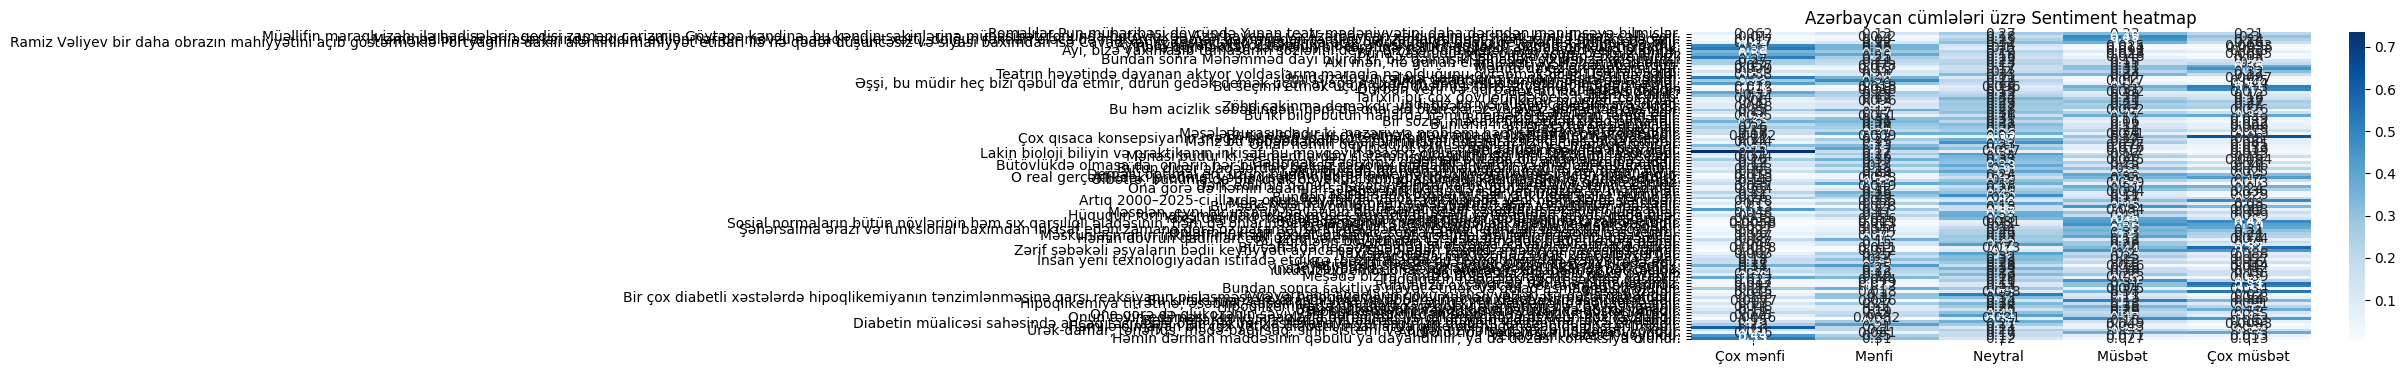

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

probs = []
for s in sentences:
    inputs = tokenizer(s, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    p = torch.softmax(outputs.logits, dim=1)[0].detach().numpy()
    probs.append(p)

plt.figure(figsize=(10,4))
sns.heatmap(probs, annot=True, cmap="Blues",
            yticklabels=sentences,
            xticklabels=list(labels.values()))
plt.title("Azərbaycan cümlələri üzrə Sentiment heatmap")
plt.show()


In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
def sentiment_grouped(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    probs = torch.softmax(outputs.logits, dim=1)[0].detach().numpy()


    stars = np.argmax(probs) + 1

    if stars in [1, 2]:
        label = "Mənfi"
    elif stars == 3:
        label = "Neytral"
    else:
        label = "Müsbət"

    return stars, label, probs
sentences = [
    "Romalılar Pun müharibəsi dövründə Yunan teatr mədəniyyətini daha dərindən mənimsəyə bilmişlər.",
    "Müəllifin maraqlı izahı ilə hadisələrin gedişi zamanı çarizmin Göytəpə kəndinə, bu kəndin sakinlərinə münasibəti fonunda bütövlükdə Azərbaycana və Azərbaycan xalqına münasibəti kimi diqqəti cəlb edir.",
    "Məmmədlinin dram əsərlərində təqdim edilən hər bir mövzu maraqlı sujet xətti, dolğun faktları eləcə də məkan və zaman baxımından tamlığı hər zaman diqqət mərkəzində olmağı bacarır.",
    "Ramiz Vəliyev bir daha obrazın mahiyyətini açıb göstərməklə Portyaginin daxili aləminin mahiyyət etibari ilə nə qədər düşüncəsiz və siyasi baxımdan isə Cavad xanın düşüncələri qarşısında aciz olduğunu da dəqiq detallarla təqdim edə bilir.",
    "Ayını oynayan aktyor tələsdiyindən, maskasını tərs taxıb, özündən xəbəri yoxdur.",
    "Hərə gülməkdən səhnənin bir tərəfinə yıxılıb, guya ki, ayıdan qorxub titrəyirik.",
    "Ayı, bizə yaxınlaşıb tamaşanın sözlərini deyir, biz isə gülməkdən ona cavab verə bilmirik.",
    "Buna yaxın düşmək olmayacaq, belimiz qırıldı.",
    "Kişini niyə yoldan çıxarmısınız?",
    "Bundan sonra Məhəmməd dayı bilirdi ki, biz gəlmişik, binadan çıxıb bizə qoşulurdu.",
    "Axı mən, nə günah eləmişəm, ay Məhəmməd dayı?",
    "Mən qətiyyətlə cavab verdim.",
    "Mənim də öz prinsiplərim var.",
    "Səhəri işə tələsdim.",
    "Teatrın həyətində dayanan aktyor yoldaşlarım maraqla nə olduğunu öyrənmək üçün üstümə gəldi.",
    "Ümidsiz düşüncələrə dalmışdım ki, qapı səsinə diksindim.",
    "Sükut uzandıqca ümidim daha da azalırdı.",
    "Əşşi, bu müdir heç bizi qəbul da etmir, durun gedək demək üçün ayağa qalxdığım anda, müdirin otağının qapısı açıldı.",
    "Bu seçimi etmək üçün şüur, düşüncə tərzi, ziya-nur, istedad verildi.",
    "Qurban verir və qurban verməkdə davam edir.",
    "Bəs bu hal nədən doğur?",
    "Biz nə edirik?",
    "Tarixin bir çox dövrlərində belə hallar çox olub.",
    "Çünki bu mövqedə elm var.",
    "İndi biz birinci sualın cavabını araşdıraq.",
    "Zöhd çəkinmə deməkdir və rəğbətə, yəni meyl göstərməyə ziddir.",
    "Bu həm acizlik səbəbindən, həm də ona aid olan qərəz ya əvəz cəhətdən ola bilər.",
    "O da altı fəsli əhatə edir.",
    "Bu iki bilgi bütün hallarda həmin nemətin qəbulunu təmin edir.",
    "Bunlar üstləri örtülü istəklərdir.",
    "Bir sözlə, məcazi fikirlərdən uzaq olmalıdır.",
    "Bunların hamısı seyrin başlanğıcıdır.",
    "Onda fərəh aşkar olar.",
    "Rica ilə xof tarazlaşdırılır.",
    "Məsələ burasındadır ki, nəzəriyyə problemi həmişəcavan bir problemdir.",
    "Bunu elə bu cür öyrənmək, qavramaq və istifadə etmək gərəkdir.",
    "Çox qısaca konsepsiyanın məğzi bundan ibarətdir: elmi biliyin inkişafı ikimərhələli bir prosesdir.",
    "Məhz bu səbəbdəndir ki, elmin inkişafında tarazsızlıq müşahidə edilmir.",
    "Onlar həmin qeyri-adiliklərin səbəbləri ilə heç maraqlanmırlar.",
    "İkinci yol daha uzun zaman kəsiyində baş verir.",
    "Belə düşünmək isə absurddur.",
    "Lakin bioloji biliyin və praktikanın inkişafı bu mövqeyin əsassız olduğunu konkret faktlarla təsdiqlədi.",
    "Mənası budur ki, elementlərdən sistemin quraşdırılması mürəkkəb bir prosesdir.",
    "Deməli burada bir anomaliya baş verir.",
    "Gətirmək istədiyimiz digər bir misal heyvanlar aləminə aiddir.",
    "Bütövlükdə olmasa da, onların hər birində şəksiz rasional məqamlar vardır və məqbul sayılmalıdır.",
    "Bütün digər əlaqələrdən bu hal üçün mühüm olmadıqlarına görə, sərfnəzər edilir.",
    "Lakin burada bir məqamı xüsusi vurğu ilə qeyd etməliyik.",
    "Deməli, optimal en, uzun, hündürlük parametrləri stolun stol olması üçün mühümdür.",
    "O real gerçəklikdəki predmet və hadisələri olduğu kimi yox, ideallaşdırılmış şəkildə inikas etdirir.",
    "Əlbəttə, bununla da biz idrak obyektini kobudlaşdırırıq, kasıblaşdırırıq, sadələşdiririk.",
    "Bunlar üzərində nəzəriyyə qurula bilməz.",
    "Dərk edilmiş qanun, nəzəriyyə insanların uğurlu fəaliyyətinin əsasıdır.",
    "Ona görə də həmin adamlar səpdikləri bitkini su və günəş işığı ilə təmin edirlər.",
    "Əgər bitkiyə su və işıq verilməzsə, o, məhv olar.",
    "Bu faktlar sanki bunların təsir gücü dairəsinə sığmırlar.",
    "Bundan hər birinə iki yaxşı xislət və iki bəd xislət verilibdir.",
    "Artıq 2000–2025-ci illərdə onun həyatında və yaradıcılığında yeni mərhələ başlamışdır.",
    "Məhz belə davranış onun şəxsiyyətinin əsas yönümünə əsaslanır.",
    "Bu, şəxsiyyətin yönümünə münasibətdə zahiri təsadüfdən ibarətdir.",
    "Bu cinayət daxili təsadüfün təzahürü olacaqdır.",
    "Məsələn, eyni bir insanın həyatının dövrləri müxtəlif cəhətlərdən təsvir oluna bilər.",
    "Hüququn formalaşmasına baxsaq proses yuxarıdan aşağı və aşağıdan yuxarı gedə bilər.",
    "Yaxşı olardı ki, faktlara əsaslanan dəqiq qanun toplusu müəyyənləşdirilsin.",
    "Bu əlaqə özünü müxtəlif qarşılıqlı asılılıqda təzahür etdirir.",
    "Sosial normaların bütün növlərinin həm sıx qarşılıqlı əlaqəsinin, həm də onların belə əlaqəsinin spesifikliyinin aşkar edilməsi çox vacibdir.",
    "O, insanı orta səviyyəyə deyil, ideala istiqamətləndirir.",
    "Şəhərsalma ərazi və funksional baxımdan inkişaf edən zamana görə öz parametrlərini dəyişən və yenidən qurulan obyektlərə söykənir.",
    "Onların inkişafı əvvəlcə kustar, sonra fabrik istehsalı əsasında baş verirdi.",
    "Məskunlaşmanın inkişafı müxtəlif sosial iqtisadi və şəhərsalma amillərinin təsiri ilə baş verir.",
    "Həmin dövrün qadınları çox uzun və enli, həm də üst-üstə geyilmiş tumanla gəzərdilər.",
    "Bu kürklərin boynundan ta ətəklərinədək bədii tikməsi olardı.",
    "Hər halda sual varsa, cavabı axtarmağa dəyər.",
    "Bu şəhərdə neçə-neçə qədim yaşayış evi ayrıca maraq doğurur.",
    "Zərif şəbəkəli əşyaların bədii keyfiyyəti ayrıca səy tələb edən texniki əməliyyat sayəsində alınır.",
    "Naxışlar qədər, rənglər də zəngin və cürbəcürdür.",
    "Məzar daşlarının üzərində daş kitabələr də var.",
    "İnsan yeni texnologiyadan istifadə etdikcə, bəzi hallarda bu texnologiyadan əziyyət də çəkir.",
    "Bu termin də stresslə bağlı xüsusi xəstəliyi ifadə edir.",
    "Həyatımızda stress çox olduqca özümüzü pis hiss edirik.",
    "İnsan həyatında meşənin əhəmiyyətini inkar etmək olmaz.",
    "Yuxusuzluq emosional yüklənmənin xoşagəlməz nəticəsidir.",
    "Bu prosesdə əsas rolu qoxu oynayır.",
    "Meşədə bizim içimizə dolan sakitlik hissi necə yaranır?",
    "Tədqiqatın nəticələri aydın şəkildə göstərir.",
    "İndi siz təbiətlə bütövləşdiniz.",
    "Ruhunuzu oxşayacaq yer tapmaq önəmlidir.",
    "Bundan sonra sakitliyə riayət etmək və qulaq asmaq tələb olunur.",
    "Meşə gözəldir.",
    "İynəyarpaqlı ağacların qoxu xüsusiyyətləri isə daha qabarıqdır.",
    "Bir çox diabetli xəstələrdə hipoqlikemiyanın tənzimlənməsinə qarşı reaksiyanın pisləşməsi və ya hipoqlikemiyanı duymamaq vəziyyəti müşahidə olunur.",
    "Bu kliniki mənzərə araşdırılma və tibbi rejimə yenidən baxılmasını tələb edir.",
    "Hipoqlikemiya titrətmə, əsəbilik, çaşqınlıq, taxikardiya və aclıq kimi əlamətlərlə məhdudlaşmır.",
    "Hipoqlikemiyada narahatlıq və qorxu əlamətləri də çox rast gəlinir.",
    "Belə hal xəstənin həyatı üçün təhlükə və qorxu yaradır.",
    "Hipoqlikemiyanın simptomları yuxarıda göstərilmişdir.",
    "Ona görə də qlükozanın səviyyəsi bərpa edildikdən sonra qida qəbulu tövsiyə olunur.",
    "Onun təyin edilməsi kliniki sınaqlarla öyrənilmiş və qlikemik nəzarət üçün çox faydalıdır.",
    "Belə hallarda yalnız insulin müalicəsi və ya düzgün qidalanma tövsiyə olunur.",
    "Diabetin müalicəsi sahəsində ancaq təcrübəsi olan həkim, xəstəxanaya yerləşdirilən diabetli xəstəni müalicə etməlidir.",
    "Hamilə olmayan bir çox yetkin diabetli insanlarda qlikemik hədəf aşağıda göstərilmişdir.",
    "Ürək-damar, tənəffüs, mədə-bağırsaq, sinir sistemi və digər üzvlərdən heç bir şikayəti yoxdur.",
    "Android tipli bədən quruluşu mövcuddur.",
    "Venadaxili kateter qoyuldu.",
    "Həmin dərman maddəsinin qəbulu ya dayandırılır, ya da dozası korreksiya olunur."
]


for s in sentences:
    stars, label, probs = sentiment_grouped(s)
    print(f"{s}  →  {label} ({stars}★)")


Romalılar Pun müharibəsi dövründə Yunan teatr mədəniyyətini daha dərindən mənimsəyə bilmişlər.  →  Müsbət (4★)
Müəllifin maraqlı izahı ilə hadisələrin gedişi zamanı çarizmin Göytəpə kəndinə, bu kəndin sakinlərinə münasibəti fonunda bütövlükdə Azərbaycana və Azərbaycan xalqına münasibəti kimi diqqəti cəlb edir.  →  Müsbət (4★)
Məmmədlinin dram əsərlərində təqdim edilən hər bir mövzu maraqlı sujet xətti, dolğun faktları eləcə də məkan və zaman baxımından tamlığı hər zaman diqqət mərkəzində olmağı bacarır.  →  Müsbət (4★)
Ramiz Vəliyev bir daha obrazın mahiyyətini açıb göstərməklə Portyaginin daxili aləminin mahiyyət etibari ilə nə qədər düşüncəsiz və siyasi baxımdan isə Cavad xanın düşüncələri qarşısında aciz olduğunu da dəqiq detallarla təqdim edə bilir.  →  Müsbət (4★)
Ayını oynayan aktyor tələsdiyindən, maskasını tərs taxıb, özündən xəbəri yoxdur.  →  Mənfi (1★)
Hərə gülməkdən səhnənin bir tərəfinə yıxılıb, guya ki, ayıdan qorxub titrəyirik.  →  Mənfi (1★)
Ayı, bizə yaxınlaşıb tamaşan

In [18]:

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
labels = ["Mənfi", "Neytral", "Müsbət"]

def sentiment_xlm(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    probs = torch.softmax(outputs.logits, dim=1)[0].detach().numpy()
    label_id = np.argmax(probs)
    return labels[label_id], probs[label_id], probs
sentences = [
    "Romalılar Pun müharibəsi dövründə Yunan teatr mədəniyyətini daha dərindən mənimsəyə bilmişlər.",
    "Müəllifin maraqlı izahı ilə hadisələrin gedişi zamanı çarizmin Göytəpə kəndinə, bu kəndin sakinlərinə münasibəti fonunda bütövlükdə Azərbaycana və Azərbaycan xalqına münasibəti kimi diqqəti cəlb edir.",
    "Məmmədlinin dram əsərlərində təqdim edilən hər bir mövzu maraqlı sujet xətti, dolğun faktları eləcə də məkan və zaman baxımından tamlığı hər zaman diqqət mərkəzində olmağı bacarır.",
    "Ramiz Vəliyev bir daha obrazın mahiyyətini açıb göstərməklə Portyaginin daxili aləminin mahiyyət etibari ilə nə qədər düşüncəsiz və siyasi baxımdan isə Cavad xanın düşüncələri qarşısında aciz olduğunu da dəqiq detallarla təqdim edə bilir.",
    "Ayını oynayan aktyor tələsdiyindən, maskasını tərs taxıb, özündən xəbəri yoxdur.",
    "Hərə gülməkdən səhnənin bir tərəfinə yıxılıb, guya ki, ayıdan qorxub titrəyirik.",
    "Ayı, bizə yaxınlaşıb tamaşanın sözlərini deyir, biz isə gülməkdən ona cavab verə bilmirik.",
    "Buna yaxın düşmək olmayacaq, belimiz qırıldı.",
    "Kişini niyə yoldan çıxarmısınız?",
    "Bundan sonra Məhəmməd dayı bilirdi ki, biz gəlmişik, binadan çıxıb bizə qoşulurdu.",
    "Axı mən, nə günah eləmişəm, ay Məhəmməd dayı?",
    "Mən qətiyyətlə cavab verdim.",
    "Mənim də öz prinsiplərim var.",
    "Səhəri işə tələsdim.",
    "Teatrın həyətində dayanan aktyor yoldaşlarım maraqla nə olduğunu öyrənmək üçün üstümə gəldi.",
    "Ümidsiz düşüncələrə dalmışdım ki, qapı səsinə diksindim.",
    "Sükut uzandıqca ümidim daha da azalırdı.",
    "Əşşi, bu müdir heç bizi qəbul da etmir, durun gedək demək üçün ayağa qalxdığım anda, müdirin otağının qapısı açıldı.",
    "Bu seçimi etmək üçün şüur, düşüncə tərzi, ziya-nur, istedad verildi.",
    "Qurban verir və qurban verməkdə davam edir.",
    "Bəs bu hal nədən doğur?",
    "Biz nə edirik?",
    "Tarixin bir çox dövrlərində belə hallar çox olub.",
    "Çünki bu mövqedə elm var.",
    "İndi biz birinci sualın cavabını araşdıraq.",
    "Zöhd çəkinmə deməkdir və rəğbətə, yəni meyl göstərməyə ziddir.",
    "Bu həm acizlik səbəbindən, həm də ona aid olan qərəz ya əvəz cəhətdən ola bilər.",
    "O da altı fəsli əhatə edir.",
    "Bu iki bilgi bütün hallarda həmin nemətin qəbulunu təmin edir.",
    "Bunlar üstləri örtülü istəklərdir.",
    "Bir sözlə, məcazi fikirlərdən uzaq olmalıdır.",
    "Bunların hamısı seyrin başlanğıcıdır.",
    "Onda fərəh aşkar olar.",
    "Rica ilə xof tarazlaşdırılır.",
    "Məsələ burasındadır ki, nəzəriyyə problemi həmişəcavan bir problemdir.",
    "Bunu elə bu cür öyrənmək, qavramaq və istifadə etmək gərəkdir.",
    "Çox qısaca konsepsiyanın məğzi bundan ibarətdir: elmi biliyin inkişafı ikimərhələli bir prosesdir.",
    "Məhz bu səbəbdəndir ki, elmin inkişafında tarazsızlıq müşahidə edilmir.",
    "Onlar həmin qeyri-adiliklərin səbəbləri ilə heç maraqlanmırlar.",
    "İkinci yol daha uzun zaman kəsiyində baş verir.",
    "Belə düşünmək isə absurddur.",
    "Lakin bioloji biliyin və praktikanın inkişafı bu mövqeyin əsassız olduğunu konkret faktlarla təsdiqlədi.",
    "Mənası budur ki, elementlərdən sistemin quraşdırılması mürəkkəb bir prosesdir.",
    "Deməli burada bir anomaliya baş verir.",
    "Gətirmək istədiyimiz digər bir misal heyvanlar aləminə aiddir.",
    "Bütövlükdə olmasa da, onların hər birində şəksiz rasional məqamlar vardır və məqbul sayılmalıdır.",
    "Bütün digər əlaqələrdən bu hal üçün mühüm olmadıqlarına görə, sərfnəzər edilir.",
    "Lakin burada bir məqamı xüsusi vurğu ilə qeyd etməliyik.",
    "Deməli, optimal en, uzun, hündürlük parametrləri stolun stol olması üçün mühümdür.",
    "O real gerçəklikdəki predmet və hadisələri olduğu kimi yox, ideallaşdırılmış şəkildə inikas etdirir.",
    "Əlbəttə, bununla da biz idrak obyektini kobudlaşdırırıq, kasıblaşdırırıq, sadələşdiririk.",
    "Bunlar üzərində nəzəriyyə qurula bilməz.",
    "Dərk edilmiş qanun, nəzəriyyə insanların uğurlu fəaliyyətinin əsasıdır.",
    "Ona görə də həmin adamlar səpdikləri bitkini su və günəş işığı ilə təmin edirlər.",
    "Əgər bitkiyə su və işıq verilməzsə, o, məhv olar.",
    "Bu faktlar sanki bunların təsir gücü dairəsinə sığmırlar.",
    "Bundan hər birinə iki yaxşı xislət və iki bəd xislət verilibdir.",
    "Artıq 2000–2025-ci illərdə onun həyatında və yaradıcılığında yeni mərhələ başlamışdır.",
    "Məhz belə davranış onun şəxsiyyətinin əsas yönümünə əsaslanır.",
    "Bu, şəxsiyyətin yönümünə münasibətdə zahiri təsadüfdən ibarətdir.",
    "Bu cinayət daxili təsadüfün təzahürü olacaqdır.",
    "Məsələn, eyni bir insanın həyatının dövrləri müxtəlif cəhətlərdən təsvir oluna bilər.",
    "Hüququn formalaşmasına baxsaq proses yuxarıdan aşağı və aşağıdan yuxarı gedə bilər.",
    "Yaxşı olardı ki, faktlara əsaslanan dəqiq qanun toplusu müəyyənləşdirilsin.",
    "Bu əlaqə özünü müxtəlif qarşılıqlı asılılıqda təzahür etdirir.",
    "Sosial normaların bütün növlərinin həm sıx qarşılıqlı əlaqəsinin, həm də onların belə əlaqəsinin spesifikliyinin aşkar edilməsi çox vacibdir.",
    "O, insanı orta səviyyəyə deyil, ideala istiqamətləndirir.",
    "Şəhərsalma ərazi və funksional baxımdan inkişaf edən zamana görə öz parametrlərini dəyişən və yenidən qurulan obyektlərə söykənir.",
    "Onların inkişafı əvvəlcə kustar, sonra fabrik istehsalı əsasında baş verirdi.",
    "Məskunlaşmanın inkişafı müxtəlif sosial iqtisadi və şəhərsalma amillərinin təsiri ilə baş verir.",
    "Həmin dövrün qadınları çox uzun və enli, həm də üst-üstə geyilmiş tumanla gəzərdilər.",
    "Bu kürklərin boynundan ta ətəklərinədək bədii tikməsi olardı.",
    "Hər halda sual varsa, cavabı axtarmağa dəyər.",
    "Bu şəhərdə neçə-neçə qədim yaşayış evi ayrıca maraq doğurur.",
    "Zərif şəbəkəli əşyaların bədii keyfiyyəti ayrıca səy tələb edən texniki əməliyyat sayəsində alınır.",
    "Naxışlar qədər, rənglər də zəngin və cürbəcürdür.",
    "Məzar daşlarının üzərində daş kitabələr də var.",
    "İnsan yeni texnologiyadan istifadə etdikcə, bəzi hallarda bu texnologiyadan əziyyət də çəkir.",
    "Bu termin də stresslə bağlı xüsusi xəstəliyi ifadə edir.",
    "Həyatımızda stress çox olduqca özümüzü pis hiss edirik.",
    "İnsan həyatında meşənin əhəmiyyətini inkar etmək olmaz.",
    "Yuxusuzluq emosional yüklənmənin xoşagəlməz nəticəsidir.",
    "Bu prosesdə əsas rolu qoxu oynayır.",
    "Meşədə bizim içimizə dolan sakitlik hissi necə yaranır?",
    "Tədqiqatın nəticələri aydın şəkildə göstərir.",
    "İndi siz təbiətlə bütövləşdiniz.",
    "Ruhunuzu oxşayacaq yer tapmaq önəmlidir.",
    "Bundan sonra sakitliyə riayət etmək və qulaq asmaq tələb olunur.",
    "Meşə gözəldir.",
    "İynəyarpaqlı ağacların qoxu xüsusiyyətləri isə daha qabarıqdır.",
    "Bir çox diabetli xəstələrdə hipoqlikemiyanın tənzimlənməsinə qarşı reaksiyanın pisləşməsi və ya hipoqlikemiyanı duymamaq vəziyyəti müşahidə olunur.",
    "Bu kliniki mənzərə araşdırılma və tibbi rejimə yenidən baxılmasını tələb edir.",
    "Hipoqlikemiya titrətmə, əsəbilik, çaşqınlıq, taxikardiya və aclıq kimi əlamətlərlə məhdudlaşmır.",
    "Hipoqlikemiyada narahatlıq və qorxu əlamətləri də çox rast gəlinir.",
    "Belə hal xəstənin həyatı üçün təhlükə və qorxu yaradır.",
    "Hipoqlikemiyanın simptomları yuxarıda göstərilmişdir.",
    "Ona görə də qlükozanın səviyyəsi bərpa edildikdən sonra qida qəbulu tövsiyə olunur.",
    "Onun təyin edilməsi kliniki sınaqlarla öyrənilmiş və qlikemik nəzarət üçün çox faydalıdır.",
    "Belə hallarda yalnız insulin müalicəsi və ya düzgün qidalanma tövsiyə olunur.",
    "Diabetin müalicəsi sahəsində ancaq təcrübəsi olan həkim, xəstəxanaya yerləşdirilən diabetli xəstəni müalicə etməlidir.",
    "Hamilə olmayan bir çox yetkin diabetli insanlarda qlikemik hədəf aşağıda göstərilmişdir.",
    "Ürək-damar, tənəffüs, mədə-bağırsaq, sinir sistemi və digər üzvlərdən heç bir şikayəti yoxdur.",
    "Android tipli bədən quruluşu mövcuddur.",
    "Venadaxili kateter qoyuldu.",
    "Həmin dərman maddəsinin qəbulu ya dayandırılır, ya da dozası korreksiya olunur."
]


for s in sentences:
    label, prob, raw = sentiment_xlm(s)
    print(f"{s}  →  {label} (ehtimal: {prob:.3f})")


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Romalılar Pun müharibəsi dövründə Yunan teatr mədəniyyətini daha dərindən mənimsəyə bilmişlər.  →  Neytral (ehtimal: 0.482)
Müəllifin maraqlı izahı ilə hadisələrin gedişi zamanı çarizmin Göytəpə kəndinə, bu kəndin sakinlərinə münasibəti fonunda bütövlükdə Azərbaycana və Azərbaycan xalqına münasibəti kimi diqqəti cəlb edir.  →  Müsbət (ehtimal: 0.420)
Məmmədlinin dram əsərlərində təqdim edilən hər bir mövzu maraqlı sujet xətti, dolğun faktları eləcə də məkan və zaman baxımından tamlığı hər zaman diqqət mərkəzində olmağı bacarır.  →  Müsbət (ehtimal: 0.438)
Ramiz Vəliyev bir daha obrazın mahiyyətini açıb göstərməklə Portyaginin daxili aləminin mahiyyət etibari ilə nə qədər düşüncəsiz və siyasi baxımdan isə Cavad xanın düşüncələri qarşısında aciz olduğunu da dəqiq detallarla təqdim edə bilir.  →  Neytral (ehtimal: 0.417)
Ayını oynayan aktyor tələsdiyindən, maskasını tərs taxıb, özündən xəbəri yoxdur.  →  Mənfi (ehtimal: 0.514)
Hərə gülməkdən səhnənin bir tərəfinə yıxılıb, guya ki, ayıdan 